# Processing Raw Text



## Lesson objectives


The goals of this lesson are to answer the following questions:

- How can we write programs to access text from the web and local files on our computers in order to process and analyze various language data?
              

- How can we split documents into individual words and symbols  so we can carry out different types of text analysis?

            
- How can we write programs to produce formatted output and save it in a file?

# Starting the Python session 

We begin the python session by importing some useful natural language processing modules and methods from the Natural Language Toolkit (NLTK).

In [ ]:
import nltk, re
from nltk import word_tokenize 

# Downloading data from the web 

Go to CONSTITUTE --> https://www.constituteproject.org/search?lang=en

Navigate the site in your browser, find the URL of the constitution you want to import, 

Then copy and paste it into a python object called 'url'

In [ ]:
url = "https://www.constituteproject.org/constitution/Afghanistan_2004?lang=en"

Using the urllib module, we will use this URL to retrieve the HTML of the constitution

In [ ]:
from urllib import request
response = request.urlopen(url)
html = response.read().decode('utf8') # usually have to guess the encoding, e.g. 'utf8', 'iso-1889-1' are commonly used
type(html) # we've imported the constitution as a string object

Now let us see what our html object looks like!

In [ ]:
print(html)

As you can see, HTML markup includes a bunch of meta tags, JavaScript, tables, etc. that we don't need for our analysis We want to eliminate all of this extraneous markup before we do any text analysis.

# Extracting useful text out of the html
To extract text out of HTML we will use a Python library called BeautifulSoup, 
http://www.crummy.com/software/BeautifulSoup/

In [ ]:
from bs4 import BeautifulSoup
raw = BeautifulSoup(html, 'html.parser').get_text()
print(raw) # HTML markup is gone, all we are left with is the raw text

# Tokenizing raw text

To do natural language processing, or NLP, we want to break up the raw string into words and punctuation, or tokens. A token is the technical name for a sequence of characters that has substantive meaning. Cat, dog, mouse, and house are tokens. Sldk#%cWuyyfF and 134r9ju!! are not tokens (although they might be good passwords). Punctuation are considered to be tokens because we assign meaning to commas, periods, question marks, etc.

Tokenization refers to the process of transforming a raw string of characters into structured a list of words and punctuation. In the exercises that follow, we will adhere to the "bag of words" assumption, meaning that we assume that documents are a bag of words wherein order does not inform our analysis. Practically speaking, this means that when we tokenize our text into a list of words and punctuation, the order in which those words and punctuation appear does not matter.  

Conveniently, NLTK has a tokenization function that works on any string object.

In [ ]:
from nltk import word_tokenize

tokens = word_tokenize(raw)
print(tokens) # tokens is a list object containing all of the words in the raw text

But notice that after tokenization, we still find some unwanted text concerning site navigation from the original website. 

We can trim this information from the string object using a process of trial and error -- i.e. slicing the string -- in order to locate the start and end indexes of the content we want.

In [ ]:
len(raw) #how long is the object? Use this to help slice the object below

#remember python indexing starts at 0

In [ ]:
raw[139:67000] # this truncates the raw string by removing the site navigation material

tokens = word_tokenize(raw[139:67000])

print(tokens)

# Importing files from your computer

Rather than import content from the web, you can also read in local files on your computer. To do so, you'll need to find the filepath on your harddrive to the document you'd like to import.


# Importing a single document

Let's start with the simplest case of reading a single file.

In [ ]:
filepath = '/Users/fionashenbayh/Documents/2019/2019 Teaching/Comparative law and courts/Constitutions/'

with open(filepath + "Constitution-Burundi-1962.txt", 'r') as filename:
    raw = filename.read()

raw

After reading the local file into Python, we can interact with this document in the same way that we interacted with the HTML object.

In [ ]:
tokens = word_tokenize(raw)

print(tokens)

# Importing a corpus

Now lets read in an entire folder of documents. First, take a quick look at what's in the folder.

In [ ]:

import os # os stands for operating system; this module helps you navigate your computer directory

filepath = '/Users/fionashenbayh/Documents/2019/2019 Teaching/Comparative law and courts/Constitutions/'

for filename in os.listdir(filepath):
        print(filename)

Now let's read in all of the files in the folder.

In [ ]:
all_the_files = [] # create an empty list to store your files

for filename in os.listdir(filepath):
    if filename.endswith(".txt"): # we just want to load .txt files
        with open(filepath + filename, encoding="ISO-8859-1") as fp:  # for each file in the filepath
            file = fp.read() # read each file
            all_the_files.append(file) # append each read file into the list object
            
all_the_files[0] # we can access individual files using list indexing

Let's verify that we've accessed all of the files in the folder. 

In [ ]:
len(all_the_files) # matches the number of readable text files in the folder

As before, we can tokenize the raw text.

In [ ]:
word_tokenize(all_the_files[0])

How would you tokenize the raw text of all the files in the corpus at once?

In [ ]:
all_tokens = []

for file in all_the_files:
    tokens = word_tokenize(file)
    all_tokens.append(tokens)

# Creating a Categorized Corpus

Sometimes we can leverage information contained in the file names to create a more organized corpus. Notice when we listed the filenames from before that they all followed the same pattern -- 'Constitution_Country_year.txt'.  We can use these string patterns to create a categorized corpus using the Plain text Corpus Reader module from NLTK.

In [ ]:
from nltk.corpus import PlaintextCorpusReader
corpus_root = "/Users/fionashenbayh/Documents/2019/2019 Teaching/Comparative law and courts/Constitutions/"
constitutions = PlaintextCorpusReader(corpus_root,'.*\.txt') # locates all files that end with '.txt'
constitutions.fileids() # we have stored the file names into a CorpusReader object called 'constitutions'

After storing the file names in the Corpus Reader object, we can now create categories based on those names.

In [ ]:
from nltk.corpus import CategorizedPlaintextCorpusReader
constitutions = CategorizedPlaintextCorpusReader(corpus_root, 
                                             fileids=r'Constitution-(\w+)-\d{4}\.txt',  #regular expressions
                                             cat_pattern=r'Constitution-(\w+)-\d{4}\.txt',
                                             encoding='latin-1')

constitutions.categories() # we have now created a corpus of constitutions, categorized by country

Creating corpus categories helps us subset our analysis in useful ways.

In [ ]:
constitutions.raw(categories="Kenya") # raw text of ALL Kenyan constitutions
constitutions.raw(categories="Ghana") # raw text of ALL Ghanaian constitutions

# Importing CSV files

In the examples above, we imported raw, unstructured text data. But sometimes we can import data that is already structured, such as csv files. In a typical CSV file, several documents are delimited by commas. Note that when importe to Microsoft Excel or Google Spreedsheets, the individual elements of CSV file are represented by rows. 

For the following examples, download the US Supreme Court confirmation hearing transcripts file: 
https://www.rstreet.org/2019/04/04/supreme-court-confirmation-hearing-transcripts-as-data/

And remember where you saved it!

# There are multiple ways to import CSV files into Python

The most straightforward way is to use the aptly named CSV module.

In [ ]:
import csv

In [ ]:
filepath = '/Users/fionashenbayh/Documents/2019/2019 Teaching/Comparative law and courts/'
file = 'April22-Supreme-Court-Confirmation-Hearing-Transcript.csv'

with open(filepath + file, newline='') as csvfile:
    csv_transcripts = csv.reader(csvfile)
    for row in csv_transcripts:
        print(row)

# The DictRead method 

A more advanced way to import a csv file is by using DictReader, which creates object that operates like a regular csv reader but maps information in each row to an ordered dictionary whose keys are given by the optional fieldnames parameter.

In [ ]:
filepath = '/Users/fionashenbayh/Documents/2019/2019 Teaching/Comparative law and courts/'
file = 'April22-Supreme-Court-Confirmation-Hearing-Transcript.csv'

with open(filepath + file, newline='') as csvfile:
    csv_transcripts = csv.DictReader(csvfile, 
                                     fieldnames=["Total Order","Order","Year","Hearing","Title","Speaker (Party)(or nominated by)","Speaker and title","Statements"])

    for row in csv_transcripts:
        print(row["Speaker and title"], row["Statements"])


# The Pandas method

CSV files can also be imported using pandas, a Python module designed to handle dataframe objects

In [ ]:
filepath = '/Users/fionashenbayh/Documents/2019/2019 Teaching/Comparative law and courts/'
file = 'April22-Supreme-Court-Confirmation-Hearing-Transcript.csv'

import pandas # module for handling dataframes
pd_transcripts = pandas.read_csv(filepath+file, encoding="ISO-8859-1")

pd_transcripts

We can now index the CSV file as a dataframe.

In [ ]:
pd_transcripts[["Year","Speaker and title", "Statements"]]

In [ ]:
pd_transcripts[["Year","Speaker and title", "Statements"]].iloc[0] # select first row

We can also tokenize the text contained in a dataframe.

In [ ]:
for index, row in pd_transcripts.iterrows():
    tokens = word_tokenize(row["Statements"])
    print(tokens)

# The NLP Pipeline

Regardless of the method we use to import our raw text, once it is stored in our Python interpreter we can begin taking the steps necessary to process the text for NLP analysis.

The basic NLP pipeline is as follows:

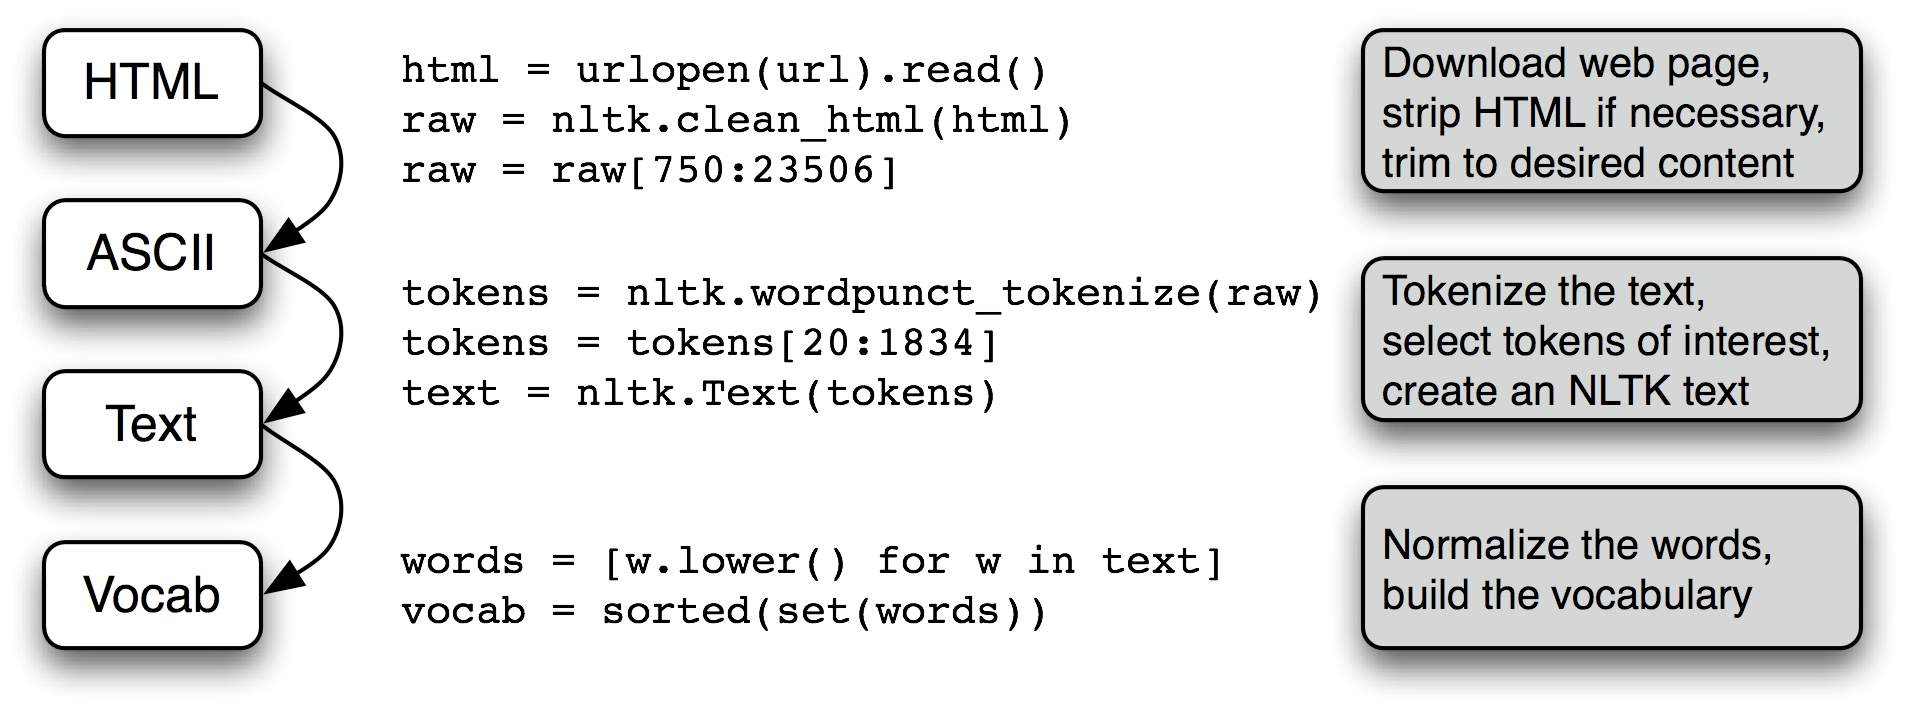

Image source: https://www.nltk.org/book/ch03.html

Let's break down the main components of the pipeline into the following terms:

1. When we load the contents of a URL or file, and when we strip out HTML markup, we produce a string.
    
2. When we tokenize a string, we produce a list of words.
   
3. When we subset the list of words to a unique set, we create another list known as the vocabulary.

Now that we've loaded in string objects (in multiple different ways), let's begin processing this text and create a unique vocabulary.

# Strings: Text Processing at the Lowest Level

The contents of a word (and of a file) are represented by programming languages as a fundamental data type known as a string. Below, we will explore the connections among strings, words, texts and files.


### Basic Operations with Strings

Strings are specified using single or double quotes. 

In [ ]:
print('this is a string')

print("this is also a string")

If a string contains a single quote, we must backslash-escape the quote so Python knows a literal quote character is intended, or else put the string in double quotes. Otherwise, the quote inside the string will be interpreted as a close quote, and the Python interpreter will report a syntax error.

In [ ]:
'The cat\'s out of the bag', "The cat's out of the bag", 'The cat's out of the bag'

When strings go over multiple lines, we use triple quotes.

In [ ]:
"""The Supreme Court of the United States (SCOTUS)
is the highest court in the federal judiciary 
of the United States of America, established 
pursuant to Article III of the U.S. Constitution in 1789. """

Note that when we print the string object, it shows where new lines begin, as marked by control character, \n.

When dealing with raw string objects, you will often seen the following control characters:

- \r = CR (Carriage Return) → Used as a new line character in Mac OS before X

- \n = LF (Line Feed) → Used as a new line character in Unix/Mac OS X

- \r\n = CR + LF → Used as a new line character in Windows

### String properties and operations

String objects have properties that allow us to use special operations them in Python. First, let's look at the + operation, known as concatenation. Concatenation of two strings produces a new string that is a copy of the two original strings pasted together end-to-end.

In [ ]:
'The' + 'Supreme' + 'Court'

Notice that concatenation doesn't insert a space between words.

In [ ]:
'The ' + 'Supreme ' + 'Court'

We can also multiply strings.

In [ ]:
('The ' + 'Supreme ' + 'Court ')*3

### Accessing Individual Characters

Strings are indexed starting from zero. When we index a string, we get one of its characters (or letters).

In [ ]:
supreme = 'The Supreme Court'

supreme[0], supreme[4], supreme[12]

### Accessing Substrings

A substring is any continuous section of a string that we want to pull out for further processing. We can access substrings using the same slice notation we use for lists. As with any list object, we can use both postive and negative indexing.

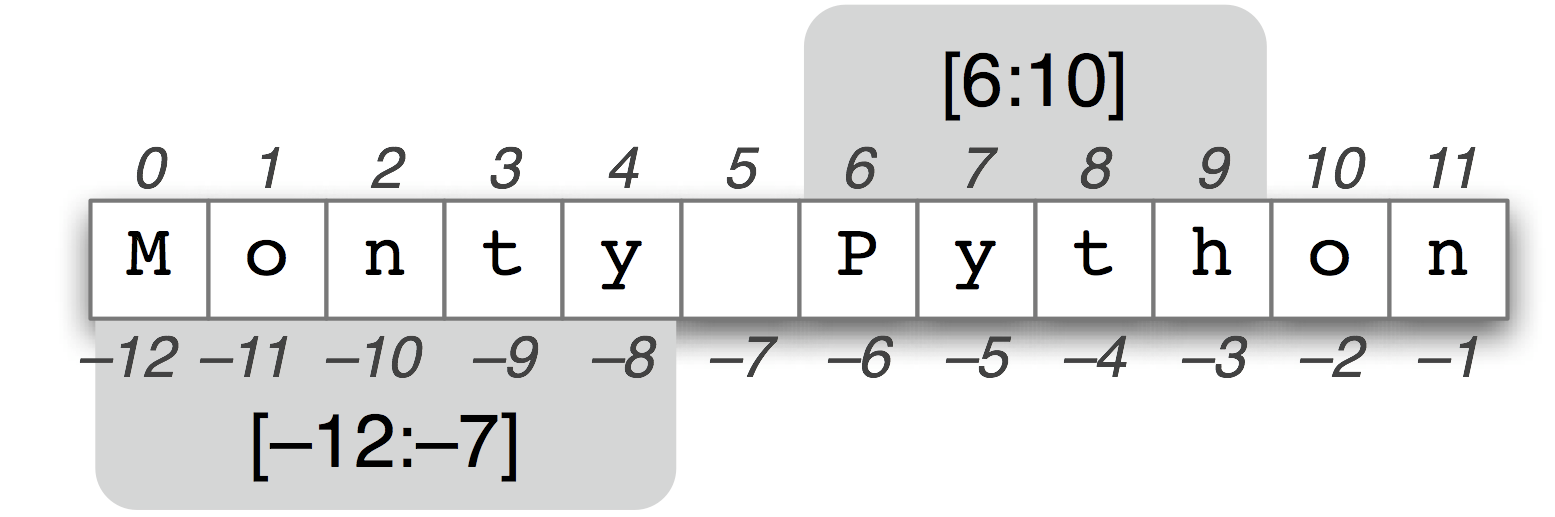

Image source: https://www.nltk.org/book/ch03.html

In [ ]:
supreme[4:11]

### More string operations

Python has comprehensive support for processing strings.

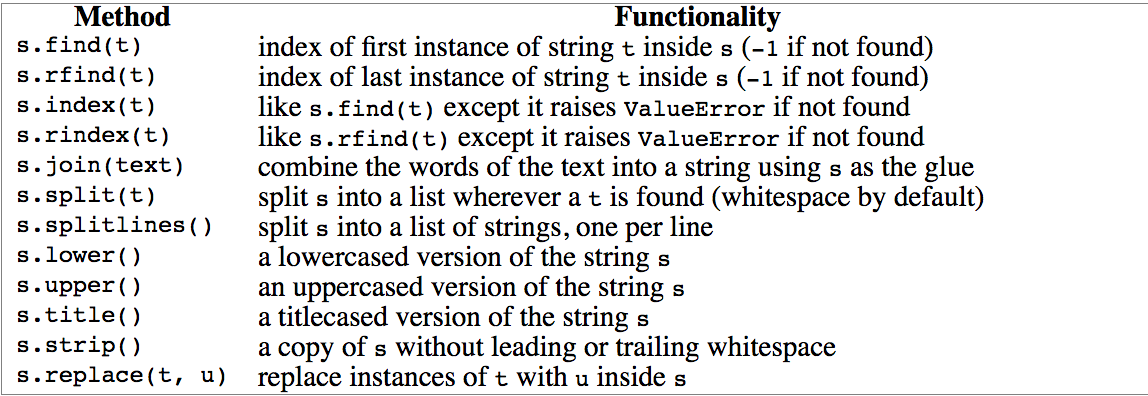

# Lists vs. Strings

Strings and lists are both kinds of sequence. We can pull them apart through indexing and slicing, we can join them together through concatenation. However, we cannot join strings and lists.

In [ ]:
query = 'Who serves on the bench?'
bench = ['Ruth', 'Sonia', 'Elena', 'John', 'Neil', 'Brett']

In [ ]:
query[2], bench[2]

In [ ]:
query[:2], bench[:2]

In [ ]:
query + " Not me"

In [ ]:
bench + 'Not me'

In [ ]:
bench + ['Not me']

# Key Differences between Strings and Lists

When we open a file for reading into a Python program, we get a string corresponding to the contents of the whole file. If we use a for loop to process the elements of this string, all we can pick out are the individual characters — we don't get to choose the granularity. 

By contrast, the elements of a list can be as big or small as we like. For example, they could be paragraphs, sentences, phrases, words, characters. So lists have the advantage that we can be flexible about the elements they contain, and correspondingly flexible about any downstream processing. Consequently, one of the first things we are likely to do in a piece of NLP code is tokenize a string into a list of strings. Conversely, when we want to write our results to a file or to a terminal, we will usually format them as a string.

In addition, lists and strings do not have exactly the same functionality. Lists have the added power that you can change their elements.

In [ ]:
del(bench[-1])

print(bench)

If we tried to do that to a string, we would get the following error:

In [ ]:
del(query[-1])

We cannot delete elements of a string because strings are immutable — you can't change a string once you have created it. But lists are mutable and their contents can be modified at any time. This makes lists a powerful container for text objects because it supports operations that modify the *original* value rather than producing a *new* value.

# Importing, cleaning, and processing raw text

Let's return to one of the files we imported at the beginning of this lesson.

In [ ]:
from urllib import request
from bs4 import BeautifulSoup

url = "https://www.constituteproject.org/constitution/Afghanistan_2004?lang=en"

response = request.urlopen(url)
html = response.read().decode('utf8')
afghan_2004 = BeautifulSoup(html, 'html.parser').get_text()

print(afghan_2004)

Recall that we have just downloaded a string object from the web.

In [ ]:
type(afghan_2004)

Let's again start by tokenizing the text to extract all of the words and punctuation as a list.

Recall that we trimmed the length of the string to get rid of web site navigation.

In [ ]:
afghan_2004[139:67000] # this truncates the raw string by removing the site navigation material

afghan_tokens = nltk.word_tokenize(afghan_2004[139:67000])

print(afghan_tokens)

# Creating a vocabulary

In NLP, a vocabulary refers to the unique set of words and/or punctuation that are the essential features of our documents. The size of the vocaublary for any analysis will depend crucially on the pre-processing steps taken to clean the the text of "irrelevant" data.

In addition to discarding word order (bag of words assumption), we also typically discard punctuation, capitalization, very common words, and very uncommon words (words that appear only once
or twice in the corpus and thus are unlikely to be discriminating). We typically remove words which
appear in less than 1% and more than 99% of documents in the corpus, although these choices
need to be made contingent both on the diversity of the vocabulary, average length of the
document, and the size of the corpus.

Some common pre-processing steps are introduced below.

### Removing punctuation

Although certain forms of punctuation -- especially emoticons or emojis -- may be considered meaningful, most NLP applications remove all punctuation during the pre-processing stage.


In [ ]:
[tokens for tokens in afghan_tokens if tokens.isalpha()]

### Removing capitalization

String objects are case sensitive, i.e. SUPREME != Supreme != supreme. Thus the first thing we should do is to tranform strings into lower case.

In [ ]:
[tokens.lower() for tokens in afghan_tokens]

### Removing stop words

“Stop” words are function words that do not convey meaning but primarily serve grammatical functions. We remove stop words because doing so can drastically reduce the size of our vocabulary.

Below, let's import the already-made stopwords dictionary from NLTK.

In [ ]:
from nltk.corpus import stopwords

[token for token in afghan_tokens if token not in stopwords.words('english')]

### Combining functions

Removing the capitalization, punctuation, and stopwords from a single document is relatively straightforward using the types of list comprehensions shown above. But we if we have hundreds or thousands of documents to process, it is better to combine these cleaning tasks into a single function.

In [ ]:
def clean_the_tokens(tokens):
    cleaned = [w.lower() for w in tokens if w.isalpha() if w not in stopwords.words('english')]
    return cleaned

In [ ]:
afghan_tokens = clean_the_tokens(afghan_tokens)

afghan_tokens

# Summary: preprocessing objectives

The goal of the preprocessing steps is that each document $i (i = 1, ... , N)$ is represented as a vector
that counts the number of times each of the $M$ unique words occur, $W_i = W_i1, W_i2, ... , W_iM)$.
Each $Wi_m$ counts the number of times the $m$-th word occurs in the $i$-th document. The collection of
count vectors into a matrix is called the document-term matrix. For a moderate volume of
documents without a particularly specialized vocabulary, this matrix will have between three
thousand and five thousand features or terms and will contain mostly zeroes (a condition we call
sparsity). Imagine how large it would be if we had not taken the preprocessing steps from above!

# Exercises

1. Define a string s = 'colorless'. Write a Python statement that changes this to 'colourless using only the slice and concatenation operations.


2. What happens if you ask the interpreter to evaluate supreme[::-1]? Explain why this is a reasonable result.


3. Create a variable words containing a list of words. Experiment with words.sort() and sorted(words). What is the difference?


4. Write a function that takes a URL as its argument, and returns the contents of the URL, with all HTML markup removed. Choose one of the constitutions from https://www.constituteproject.org/search?lang=en 


5. Write a function that reads the contents of a local folder on your computer and imports all of the documents in that folder. Do the file names lend themselves to categorization? If so, create a categorized corpus.


6. Rewrite the following nested loop as a nested list comprehension:
  	
    
![img.png](attachment: GOVT-403/img.png)

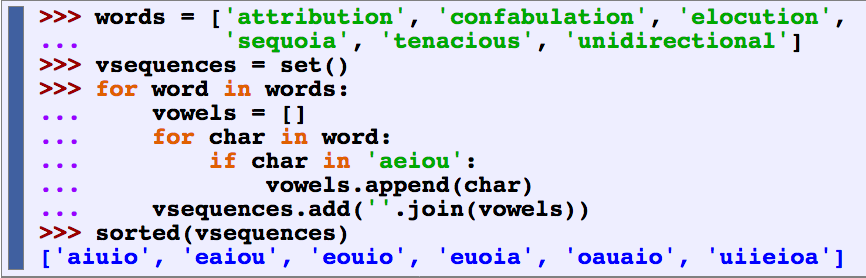